# Project: Wrangling and Analyze Data

## Table of Contents

> 1. [Introduction](#Intro)
> 2. [Data Gathering](#Gathering)
> 3. [Data Assessing](#Assessing)
> 4. [Data Cleaning](#Cleaning)
> 5. [Data Analysis and Data Visualisation](#Vis)
> 6. [Conclusions](#Conclusions)
> 7. [References](#References)


## 1. Introduction <div id ='Intro'></div>

>  This Project involves getting data from a number of sources which are presented in different formats. Assessing the quality and tidiness before wrangling is aimed at induction into a real world scenerio were data do not come clean. The tweet archive of Twitter user @dog_rates that rates people's dogs with a humorous comment about the dog would be used for this project. data required from @dog_rates to complete this project include:
>
> - An archive containing basic tweet data for all **5000+** of their tweets as they stood on August 1, 2017.
>
> - Tweet image predictions files stored on Udacity servers.
>
> - Additional data from the Twitter API to bestored in a **tweet_Json.txt** file.
>
>  Analyses and Visualisations would be created after data are cleaned and merged into a master csv file to showcase wrangling efforts using Python and packages built on it. 

**IMPORTING PACKAGES**
>
>The following softwares were installed prior to the launching of jupyter notebook in the created evironment. Conda and pip install comands were used appropriately to do so. These were then imported as show in the next cell to fufill software requirements as it applies to this projet. 

In [1]:
# Importing packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# to create an object from a given URL, request would be needed.
import requests

# to facilitate the writing of json to file, json library would be needed.
import json

# to use the Twitter API, tweepy client code would come in handy.
import tweepy

# Importing the time package to calculate the elapse time to access the Twitter API
import time

# to use the regular expressions, importing re is necesary.
import re

# writing and opening files is easier with the OS package.
import os

## 2. Data Gathering <div id ='Gathering'></div>
>
>Under this section I would write codes to download files and additional data for my analysis. Two of these files are available for download on Udacity website and they include:
>
> - twitter-archive-enhanced.csv.
>
> - image-predictions.tsv.
>
>I would have to access the Twitter API to gather additional data which would also be done under this section.
>
>At the close of this section, it is expected that I have WeRateDogs additional Twitter data written to a tweet_json.txt file in addition to other two files.

**A. Downloading twitter-archive-enhanced.csv using requests library**

In [2]:
# Creating a folder to store the files.
folder = "Project_22" 

# Checking if the folder already exist.
if not folder in os.listdir():
    os.mkdir(folder)  # Creating the folder when Project_2 do not exist.
    
# downloading twitter-archive-enhanced.csv hosted in Udacity website.    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'

response = requests.get(url)
with open(os.path.join(folder,url.split('/')[-1].replace('-','_')), mode = 'wb') as file:  # specifying the file name.
            file.write(response.content)      # Saving the object.

**B. Downloading the tweet image prediction using the requests library (image_predictions.tsv)**

In [3]:
# downloading image-predictions.tsv hosted in Udacity website to Project_2 folder as well.    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open(os.path.join(folder,url.split('/')[-1].replace('-','_')), mode = 'wb') as file:  # specifying the file name.
            file.write(response.content)      # Saving the object.

**C. Querying Twitter API for additional data Using the Tweepy library  to create tweet_json.txt**
>
> Providing keys for 'Applexy' app created to generate keys for elevated acess to twitter data.

In [4]:
# # providing keys and secrets for app created on my twitter developer account page.
# #these would be romoved later according to submission instructions

# consumer_key = ''         # API key
# consumer_secret = ''   # API secret key
# access_token = ''      # Access token
# access_secret = ''          # Access token secrets

> **OAuth Authentication**
>
> As recommended by project instructions and tweepy page (# ref 1): 
>
> - Setting the wait_on_rate_limit (Whether or not to automatically wait for rate limits to replenish) was helpfful. 
> 
> - However, wait_on_rate_limit_notify (Whether or not to print a notification when Tweepy is waiting for rate limits to replenish) **returns back an error for my code hence, I avoided it**.

In [5]:
# # Authenticating API keys
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# api = tweepy.API(auth, wait_on_rate_limit=True)

> I  would configure configure the tweet_mode to **'extended'** in the get_status because I want all messages without elipses. this is becacuse Twitter character's number is far less compared to the number of tweet in twitter-archive-enhanced.csv (more than 5000! compared to Twitter's 280!      (# ref 2)

Loading files to enable the creation of a list of tweet_ids for which more information are needed.

**Note**: Project_22 was added to regularise with work directory containing notebook.

In [6]:
# Reading WeRateDogs archive into workspace.
df_dogs = pd.read_csv('Project_22/twitter_archive_enhanced.csv')
# Reading WeRateDogs image prediction file archive into workspace with sep set to tabular.
df_image = pd.read_csv('Project_22/image_predictions.tsv', sep = '\t')

Creating tweet_id list twitter-archive-enhanced-2.csv from to help guide Twitter API query 

In [7]:
# #  creating list of tweet_ids from achive dataframe (df_dogs).
# twid_listed = df_dogs['tweet_id'].tolist()

Writing loop to find data for the list of tweet_ids to avoid interuptions when a tweet_id cannot be found.

**Note: 'get_status'** was used to find a specific tweet_id  but return all tweet.

In [8]:
#  # initialising a dicitionary to store the raw data from Twitter API JSON file for conversion to text.
# tweet_dict = {}

# # initialising a list to track errors.
# error_list = []

# # current time when the Twitter API starts.
# str_loop = time.time()

# # writing loop to query Twitter API for each tweet_id in twid_listed 
# # and to avoid interruption should any tweet_id be not found.
# for tweet in twid_listed:
#     try:
#         twt_status = api.get_status(tweet, wait_on_rate_limit = True, tweet_mode = 'extended')          
#         # writing  _json data to dictionary.
#         tweet_dict[str(tweet)] = twt_status._json                     
#     except:
#          # writing errors to list for tracking purposes and to print error message alerts .
#         error_list.append(str(tweet))                                    
#         print("tweet_id did not found: {}".format(str(tweet)))

# # Current time when the Twitter API ends.
# end_loop = time.time()

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


tweet_id did not found: 888202515573088257


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

tweet_id did not found: 873697596434513921


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


tweet_id did not found: 872668790621863937


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


tweet_id did not found: 872261713294495745


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


tweet_id did not found: 869988702071779329


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


tweet_id did not found: 866816280283807744


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


tweet_id did not found: 861769973181624320


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

tweet_id did not found: 856602993587888130


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


tweet_id did not found: 856330835276025856


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

tweet_id did not found: 851953902622658560


Unexpected parameter: wait_on_rate_limit


tweet_id did not found: 851861385021730816


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

tweet_id did not found: 845459076796616705


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


tweet_id did not found: 844704788403113984


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


tweet_id did not found: 842892208864923648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

tweet_id did not found: 837366284874571778


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


tweet_id did not found: 837012587749474308


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

tweet_id did not found: 829374341691346946


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


tweet_id did not found: 827228250799742977


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

tweet_id did not found: 812747805718642688


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

tweet_id did not found: 802247111496568832


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

tweet_id did not found: 779123168116150273


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

tweet_id did not found: 775096608509886464


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

tweet_id did not found: 771004394259247104


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


tweet_id did not found: 770743923962707968


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


tweet_id did not found: 766864461642756096


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

tweet_id did not found: 759923798737051648


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit


tweet_id did not found: 759566828574212096


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Rate limit reached. Sleeping for: 217
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected paramete

tweet_id did not found: 754011816964026368


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

tweet_id did not found: 680055455951884288


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit
Unexpected param

In [9]:
# converting the tweet_dict dictionary to tweet_json.txt and saving to project_22 folder.
with open('project_22/tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_dict, file)

Loading json text into pandas dataframe to ascertain the sucess of query
**Orient** is a parameter of read_json according to (# ref 3) and can be used as index.

In [10]:
# Loading the tweet_json.txt into panda DataFrame and printing the first 3 rows.
df_json = pd.read_json('project_22/tweet_json.txt', orient = 'index') # Atention to the orient defined as index.
df_json.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1998-04-12 22:37:23.555336193,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1998-04-10 03:03:41.306343426,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1998-04-05 22:26:21.378084864,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [11]:
# Save in csv form
df_json.to_csv('project_22/jsontext.csv', index = True)

In [12]:
# read in estracted csv to dataframe
df_jsontext = pd.read_csv('project_22/jsontext.csv')

# rename id and unnamed columns to orient and tweet id
df_jsontext.rename(columns={'Unnamed: 0' : 'orient', 'id':'tweet_id'}, inplace = True)

#display first 3 rows
df_jsontext.head(3)

,orient,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,1998-04-12 22:37:23.555336193,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,1998-04-10 03:03:41.306343426,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,1998-04-05 22:26:21.378084864,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


> Summary:
>
> I have gathered the three required files and loaded them at some point into this notebook!. These files and their dataframes are:
>
> 1. twitter_archive_enhanced.csv loaded into df_dogs!
>
> 2. image_predictions.tsv loaded into df_image!
>
> 3. tweet_json.txt converted to csv and loaded into df_jsontext!

## 3. Assessing Data <div id ='Assessing'></div>
 Here, I will visually and programmatically assess the dataset presented by the three Dataframes created from downloaded archives and additional data. Original ratings (no retweets) with their corresponding images would be focused on instead of retweets. As specified by project instructions:

* **Issues related to messsy data** should be identified with eight (8) of them documented. Examples of such issues are absurd or invalid data and duplicate data.

* Two (2) others to be deocumented should address **dirty data issues**. Examples may include clumsy entries and faulty column labels 

Therefore, I would **document** a summary to contain a minimum of 10 issues in total after **detection** at the end of this category. Afterwards, I would resolve them by cleaning in the next category. This, I would do in turn for each dataframe highlighting issues detected in subcategories before coaliting into a summerising list at the end for organisation purposes. These subcategories include:

   A.   Assessing dataframe one (df_dogs) containing twitter_archive_enhanced.csv.

   B.   Assessing dataframe two (df_image) containing image-predictions.tsv.

   C.   Assessing dataframe three (df_jsontext) containing tweet_json.txt.
   
   
   >**VISUAL INSPECTION**
>
 > Inspecting all three datasets (A,B and C) visually, the following **issues** were detected;
 > 
  > **1. Tidyness** -Data needed is fragmented into three different dataframes. Handling data is difficult without a merger of A and B

**A. ASSESSING DATAFRAME ONE (df_dogs) CONTAINING TWITTER_ENHANCED.CSV**

twitter_archive_enhanced.csv was loaded into df_dogs dataframe and read into the working jupyter notebook earlier when a list of tweet_id to guide download of additional data from Twitter API query was required. Thus, I need not re-read it in again. 

In [13]:
# displaying the rows and columns of df_dogs
df_dogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


>More issues detected visually include:
>
>**1.Quality** -unsual names for dogs (e.g a, none) were found repeatedly in rows 2351, 2352, 2353, 2354 and 3255 of 'names' column  of df_dogs which indicates incorrect/invalid data.
>
>**2.Quality** -null values were found in 5 columns of df_dogs which are in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id. and retweeted_status_timestamp.
> 
>**3.Quality** -Wrong datatype presented by 'timestamp' column of df_dogs which should be converted to dates.
>
>**4.Quality** -wrong data format of data in 'source' column of df_dogs. Html tags are attached to URLs, turning them to jargon and hyperlinks.
>
>
>
>**2.Tidyness** -Doggo, floofer, pupper, puppo columns of df_dogs describe a single variable-'dog stage' hence, should heve been in the same column for tidyness.

**PROGRAMMATIC ASSESSMENT**

Programmaticaly assessing df_dogs

In [14]:
# displaying general information about the dataframe
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

>**5.Quality** -In df_dogs, tweet_ids with retweet values 78 retweeted_status_id can duplicate the same dog in each retweet.
>
>**6.Quality** -In df_dogs, tweet_ids with 78 in_reply_to_status_id can duplicate the same dog in each reply.
>
>**7. Quality issue** In df_dogs, expanded_urls have 2297 non null-values, others are missing.

In [15]:
# verifyng the number of rows in the dataset
df_dogs.shape[0]

2356

In [16]:
# verifyng the number of columns in the dataset
df_dogs.shape[1]

17

.info confirmed programatically that the 5 columns visually diagnosed earlier to have missing data in addition to the expanded_urls column contained data in fewer rows than 2356!
>
Verifying the sum of missing data progamatically.

In [17]:
# checking for the sum of missing values per column of the dataset
df_dogs.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

It is necessary to programmatically compare unique tweet_id to unique dog names to validate name repetition.

In [18]:
# verifyng the number of unique tweet_id in the dataset
df_dogs.tweet_id.nunique()

2356

In [19]:
# checking for the number of unique dog names in the dataset
df_dogs.name.nunique()

957

957 dog names is less than 2356 unique tweets, therefore there is the need to verify if there are repetitions of dognames using the value_counts command.

In [20]:
# verifyng how many times each dog name appears in the dataset using value counts
df_dogs.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Barney       1
Rey          1
Katie        1
Mitch        1
Pip          1
Name: name, Length: 957, dtype: int64

Using value_counts() on name column validates staggering re-occurence of unsual names for dogs ('a'-55 times and 'none'-745 times) which may be attributed to incorrect data entries.

Assessing with .sample to detect more issues.

In [21]:
# displaying 5 random rows from df_dogs dataset
df_dogs.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2098,670727704916926465,NaN,NaN,2015-11-28 22:15:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrie. He's a handheld pup. Excellen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670727704...,10,10,Jeffrie,None,None,None,None
919,756526248105566208,NaN,NaN,2016-07-22 16:28:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",All hail sky doggo. 13/10 would jump super hig...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756526248...,13,10,None,doggo,None,None,None
499,813127251579564032,NaN,NaN,2016-12-25 21:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's an anonymous doggo that appears to be v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813127251...,11,10,None,doggo,None,None,None
1739,679511351870550016,NaN,NaN,2015-12-23 03:58:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to William. He makes fun of others b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679511351...,7,10,William,None,None,None,None
892,759447681597108224,NaN,NaN,2016-07-30 17:56:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He has no idea what happened h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759447681...,11,10,Oakley,None,None,None,None


.sample(5) returned 5 random rows! 

>**3. Tidyness issue** (clumsy data) detected in row 1165 of df_dogs!. dog descriptions and urls found in the same column(text column).
>
>

Investigating rating_denominator column with value_counts command..

In [22]:
# verifying how many denominators are present in the dataset
df_dogs.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

There are 18 different denominators in the rating_denominator column instead of 1!. This validates inconsistency in this regard!

Checking If there are duplicated Tweet_id

In [23]:
# find the total number of duplicated rows in df_dogs dataframe
df_dogs.tweet_id.duplicated().sum()

0

Verifying if there were tweets beyond 2017-08-02 in Twitter enhanced archive

In [24]:
# Checking if there tweets beyond the date 2017-08-02 in df_dogs
df_dogs[df_dogs.timestamp >= "2017-08-02"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


There are no duplicated Ids and tweets beyond 2017-08-02 in Twitter enhanced archive!

**B. ASSESSING DATAFRAME TWO (df_image) CONTAINING IMAGE-PREDICTIONS.TSV**

IMAGE-PREDICTIONS.TSV was loaded into df_image dataframe and read into the working jupyter notebook earlier on the same line of code with df_dogs. Therefore, I need not re-read it in again.

In [25]:
# displaying the rows and columns of df_image
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


>**Visual Assessment**
>
>**8. Quality** - P1, P2 and P3 columns of df_image with dog breed entries is inconsistent i.e Some entries have got underscore in them while some others are in sentence and lower cases.


>**Programatic assessment**
>
> writing codes to detect more issues.

In [26]:
# displaying general information about the dataframe
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Assessing visually, jpg_url column seemed to assign the same image to different tweet_id. Hence, checking for duplicate image urls in df_image dataframe.

In [27]:
# find the number of duplicated tweet_id in df_image dataframe
df_image.duplicated().sum()

0

In [28]:
# find the number of duplicated tweet_id in df_image dataframe
df_image.tweet_id.duplicated().sum()

0

Although, tweet_ids and the complete .TSV dataset returned zero values for duplicates, visual assessment of jpg_url column should be programmatically investigated.

In [29]:
# find the number of duplicated tweet_id in df_image dataframe
df_image.jpg_url.duplicated().sum()

66

In [30]:
# displaying data containing duplicated images
df_image[df_image.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


>**Issue detected**
>
>**9. Quality** - single image assigned to multiple tweet_ids by the 'jpg_url' column of df_image indicating data duplication.
>
>**10. Quality** - df_image is inadequate for analysis because data showing 'favourite count' was not included
>
>**11. Quality** - df_image is inadequaate for analysis due ommision of data accounting for 'retweet count'

**A. ASSESSING DATAFRAME THREE (df_jsontext) CONTAINING TWEET_JSON.TXT**

In [31]:
# displaying the rows and columns of df_jsontext
df_jsontext

,orient,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,1998-04-12 22:37:23.555336193,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,1998-04-10 03:03:41.306343426,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,1998-04-05 22:26:21.378084864,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,1998-04-04 11:32:37.279858688,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,1998-03-31 06:59:18.926688256,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,1991-02-08 21:40:48.165822465,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2323,1991-02-08 20:17:06.329800704,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2324,1991-02-08 17:16:52.701032449,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2325,1991-02-08 16:08:05.002620928,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [32]:
# displaying general information about df_jsontext dataframe
df_jsontext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   orient                         2327 non-null   object 
 1   created_at                     2327 non-null   object 
 2   tweet_id                       2327 non-null   int64  
 3   id_str                         2327 non-null   int64  
 4   full_text                      2327 non-null   object 
 5   truncated                      2327 non-null   bool   
 6   display_text_range             2327 non-null   object 
 7   entities                       2327 non-null   object 
 8   extended_entities              2057 non-null   object 
 9   source                         2327 non-null   object 
 10  in_reply_to_status_id          77 non-null     float64
 11  in_reply_to_status_id_str      77 non-null     float64
 12  in_reply_to_user_id            77 non-null     f

In [33]:
# displaying the rows and columns of df_jsontext
df_jsontext.isna().sum()

orient                              0
created_at                          0
tweet_id                            0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 270
source                              0
in_reply_to_status_id            2250
in_reply_to_status_id_str        2250
in_reply_to_user_id              2250
in_reply_to_user_id_str          2250
in_reply_to_screen_name          2250
user                                0
geo                              2327
coordinates                      2327
place                            2326
contributors                     2327
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                132
possibly_sen

In [34]:
# using '.shape' to get a list containing no of rows and columns as elements
df_jsontext.shape

(2327, 33)

>Observations
>
>**12. Quality** -17 columns of df_jsontext have missing values, while 14 of these affected columns are missing staggering amount of such!
>
>**4. Tidyness** -'extended_entities' column of df_jsontext contains integers and strings which makes it difficult to handle data.

### SUMMARY
Here is a recap of identified issues docummented during assessment of Twitter_archive_enhanced.csv, Image_predictions.tsv and  Tweet_json.txt.

### Quality issues
1. Unsual names for dogs (e.g a, none) were found repeatedly in rows 2351, 2352, 2353, 2354 and 3255 of 'names' column  of df_dogs which indicates incorrect/invalid data. (**Left uncleaned - I have met dogs with awkward names!**)


2. Null values were found in columns of df_dogs which are in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id. and retweeted_status_timestamp.


3.  wrong data format of data in 'source' column of df_dogs. Html tags are attached to URLs, turning them to jargon and hyperlinks


4. Wrong datatype presented by 'timestamp' column of df_dogs which should be converted to dates.


5. In df_dogs, tweet_ids with retweet values (retweeted_status_id) can duplicate the same dog picture in each retweet.


6. In df_dogs, tweet_ids with in_reply_to_status_id can duplicate the same dog picture in each reply.


7. In df_dogs, expanded_urls have 2297 non null-values, others are missing.


8. P1, P2 and P3 columns of df_image with dog breed entries is inconsistent i.e Some entries have got underscore in them while some others are in sentence and lower cases.


9. single image assigned to multiple tweet_ids by the 'jpg_url' column of df_image indicating data duplication.


10. df_image is inadequate for analysis because data showing 'favourite count' was not included.


11. df_image is inadequate for analysis due ommision of data accounting for 'retweet count'.


**Observations** from df_jsontext would be left uncleaned!


**12.** 17 columns of df_jsontext have missing values, while 14 of these affected columns are missing staggering amount of such!.

### Tidiness issues
12. (1) Data needed is fragmented into three different dataframes. Handling data is difficult without a merger of A and B.


13. (2) Doggo, floofer, pupper, puppo columns of df_dogs describe a single variable-'dogtionary' hence, should heve been in the same column for tidyness.


14. (3) clumsy data detected in row 1165 of df_dogs!. Dog descriptions and urls found in the same column(text column).

**Observations** from df_jsontext would be left uncleaned!

**4.** 'extended_entities' column of df_jsontext contains integers and strings which makes it difficult to handle data.

## 4. Cleaning Data <div id ='Cleaning'></div>
Issues documented would be cleaned under this session.This would be done on a copy of the original dataframes. this would ensure that unmodified version of data exists for reference purposes. Data cleaning would not be done in sequential manner

### A. Making Copies

In [35]:
# copying original pieces of data using .copy() code

# making a copy of df_dogs.
df_cleandogs = df_dogs.copy()

# making a copy of df_image.
df_cleanmage = df_image.copy()

# making a copy of df_jsontext. 
df_cleantext = df_jsontext.copy()

### B. Issue #7: 
in df_dogs, expanded_urls have 2297 non null-values, others are missing.

#### Define:
 Fill missing values in expanded_urls with None

#### Code

In [36]:
#filling missing expanded_ url entries with none using .fillna()
df_cleandogs['expanded_urls'].fillna('none', inplace = True)

#### Test

In [37]:
# verifying that non-null count of expanded_url is now 2356 using .info()
df_cleandogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2356 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### C. Issue #4: 
wrong datatype presented by 'timestamp' column of df_dogs which should be converted to dates

#### Define
Covert time stamp to datetime

#### Code

In [38]:
# converting timestamp to datetime
df_cleandogs['timestamp'] = pd.to_datetime(df_cleandogs['timestamp'])

#### Test

In [39]:
df_cleandogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2356 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### D. Issue #3:
wrong data format of data in 'source' column of df_dogs. Html tags are attached to URLs, turning them to jargon and hyperlinks

#### Define
remove html tags, retain urls and append new column to twitter archive to contain other relevant data

#### Code

In [40]:
# creating empty lists to record split datas after tags are removed
df_1 = [] 
df_2 = [] 

# apply split function to source column of df_cleandogs
for index in df_cleandogs.source:
    df_1.append(index.split('</a')[0].split('<a href="')[1].split('" rel="nofollow">')[1] )
    df_2.append(index.split('</a')[0].split('<a href="')[1].split('" rel="nofollow">')[0] )

# allocate data stored in df_cleandogs1 to override original hybrid source column
df_cleandogs['source'] = df_1

# add in our newly created row by concatenation 
df_cleandogs = pd.concat([df_cleandogs, pd.DataFrame(df_2, columns = ['source_urls'])], axis = 1)

#### Test

In [41]:
# displaying first 3 rows for visual evaluation
df_cleandogs.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_urls
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,http://twitter.com/download/iphone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,http://twitter.com/download/iphone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,http://twitter.com/download/iphone


In [42]:
# printing counts of new columns to console to verify all rows are appended
print(df_cleandogs.source.value_counts())
df_cleandogs.source_urls.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64


http://twitter.com/download/iphone              2221
http://vine.co                                    91
http://twitter.com                                33
https://about.twitter.com/products/tweetdeck      11
Name: source_urls, dtype: int64

### E. Issue #9:
single image assigned to multiple tweet_ids by the 'jpg_url' column of df_image indicating data duplication.

#### Define
drop rows containing duplicated images

#### Code

In [43]:
# removing duplicate from specific column using numpy opposite indexing.

# ref 4
# assigning duplicated jpg url to indexing.
indexing = df_image.jpg_url.duplicated()

# ref 5
# using reverse indenxing to keep out duplicates
indexing = np.logical_not(indexing)

# assigning data excluding duplicates to dataframe.
df_cleanmage = df_cleanmage[indexing]

#### Test

In [44]:
# printing to console sum of duplicates that may exist
print("{} duplicated.".format(sum(df_cleanmage.jpg_url.duplicated())))

0 duplicated.


### F. Issue #14:
In df_dogs, tweet_ids with retweet values (retweeted_status_id and in_reply_to_status_id) can duplicate the same dog picture in each reply.

#### Define
clumsy data detected in row 1165 of df_dogs!. Dog descriptions and urls found in the same column(text column).

#### Code

In [45]:
# creating empty lists to record split datas after tags are removed
df_3 = [] 
df_4 = [] 

# apply split function to text column of df_cleandogs
for index in df_cleandogs.text:
    df_3.append(' '.join(index.split(" ")[:-1]))
    df_4.append(index.split(" ")[-1])

# allocate data stored in df_cleandogs1 to override original hybrid source column
df_cleandogs['source'] = df_3

# add in our newly created row by concatenation 
df_cleandogs = pd.concat([df_cleandogs, pd.DataFrame(df_4, columns = ['text_urls'])], axis = 1)

#### Test

In [46]:
# displaying table to visually ascertain text_url and that text column is clean
df_cleandogs.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_urls,text_urls
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,http://twitter.com/download/iphone,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,http://twitter.com/download/iphone,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,http://twitter.com/download/iphone,https://t.co/wUnZnhtVJB


### G. Issue #5 and #6:
tweets_ids with retweets are the one that have replies too. Therefore, I will clean both at once.

5. In df_dogs, tweet_ids with retweet values (retweeted_status_id) can duplicate the same dog picture in each retweet.

6. In df_dogs, tweet_ids with in_reply_to_status_id can duplicate the same dog picture in each reply.

#### Define
remove 78 tweet_id with retweet and reply values

#### Code

In [47]:
# removing issue defined using pandas indexing for selecting data. 
# Ref 6

indexing = df_cleandogs.retweeted_status_id.isna()
indexing = df_cleandogs.in_reply_to_status_id.isna()

# assigning data excluding duplicates to dataframe.
df_cleandogs = df_cleandogs[indexing]

#### Test

In [48]:
# Verifying with .info() that that 78 non-null rows in_reply_to_status_id and retweeted_status_id are now 0
df_cleandogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2278 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2278 non-null   datetime64[ns, UTC]
 4   source                      2278 non-null   object             
 5   text                        2278 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2278 non-null   object             
 10  rating_numerator            2278 non-null   int64           

### H. Issue #13:
Doggo, floofer, pupper, puppo columns of df_dogs describe a single variable-'dogtionary' hence, should heve been in the same column for tidyness.

#### Define
merge all dog dtages into one column

#### Code

In [49]:
# selecting dog stages columns to be combined
stages = df_cleandogs[['doggo', 'floofer', 'pupper', 'puppo']]

# replacing all 'none' values with empty string
stages = stages.replace('None', '')

In [50]:
# merging dog stages columns into dogtionary using numpy array
# ref 7
dogtionary = np.array(stages['doggo']) + np.array(stages['floofer']) + np.array(stages['pupper']) + np.array(stages['puppo'])
             
# identifyng dogs in two categories as double identity
dogtionary[dogtionary =='doggopuppo'] = 'double identity'
dogtionary[dogtionary =='doggofloofer'] = 'double identity'
dogtionary[dogtionary =='doggopupper'] = 'double identity'

In [51]:
# removing original four columns containing dog stages
df_cleandogs.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

# Appending dogtionary to df_cleandogs through concatenation.
df_cleandogs = pd.concat([df_cleandogs, pd.DataFrame(dogtionary, columns = ['dogtionary'])], axis = 1)

#### Test

In [52]:
# verifying with counts of stages in dogtionary
df_cleandogs.dogtionary.value_counts()

                   1906
pupper              242
doggo                80
puppo                28
double identity      13
floofer               9
Name: dogtionary, dtype: int64

In [53]:
# displaying first three rows of df_cleandogs to verify dropped columns and added dogtionary
 df_cleandogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,source_urls,text_urls,dogtionary
0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,http://twitter.com/download/iphone,https://t.co/MgUWQ76dJU,
1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,http://twitter.com/download/iphone,https://t.co/0Xxu71qeIV,
2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,http://twitter.com/download/iphone,https://t.co/wUnZnhtVJB,
3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,http://twitter.com/download/iphone,https://t.co/tD36da7qLQ,
4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,http://twitter.com/download/iphone,https://t.co/AtUZn91f7f,


### I. Issue #2:
Null values were found in columns of df_dogs which are in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id. and retweeted_status_timestamp.

#### Define
drop all 5 affected columns

#### Code

In [54]:
# drop all 5 empty irrelevant columns from df_cleandogs
df_cleandogs.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',\
                   'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [55]:
# displaying first 3 rowes of df_cleandogs for visual inspection
df_cleandogs.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,source_urls,text_urls,dogtionary
0,8.924206e+17,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,http://twitter.com/download/iphone,https://t.co/MgUWQ76dJU,
1,8.921774e+17,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,http://twitter.com/download/iphone,https://t.co/0Xxu71qeIV,
2,8.918152e+17,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,http://twitter.com/download/iphone,https://t.co/wUnZnhtVJB,


### J. Issue #10 and 11::
df_image is inadequate for analysis because data showing 'favourite count' was not included.
df_image is inadequate for analysis due ommision of data accounting for 'retweet count'.

#### Define
merge clean copies of extracted data (df_jsontext) with image data (df_cleanmage)

#### Code

In [56]:
# print all columns of df_jsontext
df_jsontext.columns

Index(['orient', 'created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [57]:
# drop all columns of df_jsontext with the exception of tweet_id, favourite count and retweet count
df_needed = df_jsontext.drop(['orient', 'created_at', 'id_str', 'full_text', 'truncated',\
                              'display_text_range', 'entities', 'extended_entities', 'source',\
                              'in_reply_to_status_id', 'in_reply_to_status_id_str',\
                              'in_reply_to_user_id', 'in_reply_to_user_id_str',\
                              'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',\
                              'contributors', 'is_quote_status','favorited', 'retweeted', 'possibly_sensitive',\
                              'possibly_sensitive_appealable', 'lang', 'retweeted_status',\
                              'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink','quoted_status'], axis=1)
# convert tweet_id to string for ease of merging
df_needed.tweet_id = df_needed.tweet_id.astype(str)

# display two rows
df_needed.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6969,33693
1,892177421306343426,5272,29218


In [58]:
# append to clean image copy
df_cleanmage= df_cleanmage.append(df_needed)

#### Test

In [59]:
# displaying the last 5 rows to verify new column
df_cleanmage.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,NaN


### K. Issue #8:
P1, P2 and P3 columns of df_image with dog breed entries is inconsistent i.e Some entries have got underscore in them while some others are in sentence and lower cases.

#### Define
replace underscore with empty strings and convert all affected data to lowercase in clean copy

#### Code

In [60]:
# writing a loop to remove underscore and convert to lower case
P_columns = ['p1','p2','p3']
for c in P_columns:
    df_cleanmage[c] = df_cleanmage[c].str.replace('_',' ').str.lower()

#### Test

In [61]:
df_cleanmage.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True,NaN,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN,NaN


### L. Issue #12:
Data needed is fragmented into three different dataframes. Handling data is difficult without a merger of A(df_cleandogs) and B(df_cleanmage).

#### Define
merge cleaned copies of df_dogs and df_image

#### Code

In [62]:
# merging data into a master dataset
df_masterset = pd.merge(df_cleanmage, df_cleandogs, how="left", left_on="tweet_id", right_on="tweet_id")

#### Test

In [63]:
# displaying the first 5 rows of master dataset
df_masterset.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,source_urls,text_urls,dogtionary
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,...,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,http://twitter.com/download/iphone,https://t.co/r7mOb2m0UI,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,...,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,http://twitter.com/download/iphone,https://t.co/DWnyCjf2mx,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## M. Storing Data
Gathered, assessed, and cleaned master dataset is saved to a CSV file named "twitter_archive_master.csv".

In [64]:
# Saving the df_masterset as twitter_archive_master.csv
df_masterset.to_csv('project_22/twitter_archive_master.csv', index = False, encoding = 'utf-8')

## 5. Analyzing and Visualizing Data <div id ='Vis'></div>
Wrangled master dataset would be read into workspace for exploration to produce **three (3) insights and one (1) visualization.**

In [65]:
# reading the master dataset into workspace.
df_master = pd.read_csv('project_22/twitter_archive_master.csv')
df_master.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,source_urls,text_urls,dogtionary
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,...,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,http://twitter.com/download/iphone,https://t.co/r7mOb2m0UI,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### A. Insights:
1. How do categories of dogtionary affect ratings? 

2. For dogs under review, is there a relationship between favorite and retweets counts?

3. What is the distribution of dogs under review by dogtionary terms?

### B. Analyzing
**Insight 1**

How do categories of dogtionary affect ratings? 

In [66]:
# using group by to determine how dogtionary terms rate and the size per rating
df_master.groupby(['rating_numerator', 'dogtionary']).size()

rating_numerator  dogtionary     
2.0               pupper              1
3.0               pupper              2
4.0               doggo               2
5.0               floofer             1
                  pupper              1
7.0               pupper              4
                  puppo               1
8.0               doggo               1
                  pupper              8
9.0               pupper             11
10.0              doggo               3
                  double identity     2
                  pupper             30
                  puppo               1
11.0              doggo               7
                  double identity     1
                  floofer             1
                  pupper             29
                  puppo               2
12.0              doggo              15
                  double identity     2
                  floofer             2
                  pupper             26
                  puppo               4
13.0  

Disscussion:

From the result of Insight 1, it can be seen that the numbers of puppers rating above 9.0 is staggering. 11, 30, 29, 26 and 13 of them rated 9, 10, 11, 12 and 13 scores respectively!. Although, there were only 5 with double identity, they all rated 10 and higher which implies that dogs with double identity tend to recieve better ratings. 

A bar chart is show to visualise this insight in the visualisation session.

**Insight 2**

For dogs under review, is there a relationship between favorite and retweets counts?

In [67]:
# use '.describe' to get statistical data of retweet and favorite counts
df_master[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,2327.000000,2327.000000
mean,2458.667383,7026.266867
std,4163.681864,10919.219612
min,1.000000,0.000000
25%,492.500000,1220.500000
50%,1144.000000,3037.000000
75%,2844.500000,8564.000000
max,70330.000000,144246.000000


2327 dogs got retweeted and liked as favourites simultaneously!. The average retweet count per dogs (2458 retweets) is one third the average number of favourite counts (7026 likes). The dog with the maximum likes (144247 favorite counts) got almost double the number of maximum retweets gotten by any dog under review (70334 retweets).

A scatter plot is shown to better visualise this insight in the visualisation session.

**Insight 3**

What is the distribution of dogs under review by dogtionary terms?

In [68]:
# displaying counts of each dogtionary terms present in the master dataset
df_master.dogtionary.value_counts()

pupper             127
doggo               34
puppo               12
double identity      7
floofer              5
Name: dogtionary, dtype: int64

Disscussion:

the largest number of dogs (127) were identified as puppers!. Therefore, majority of dogs in the dataset are either small yet, equally or more matured than some doggos or are inexperienced or unprepared for responsibilities associated with being a doggo according to definition of dogtionary terms.



### C. Visualization
**Insight 1**

Bar chart showing dogs by dogtionary terms and their ratings

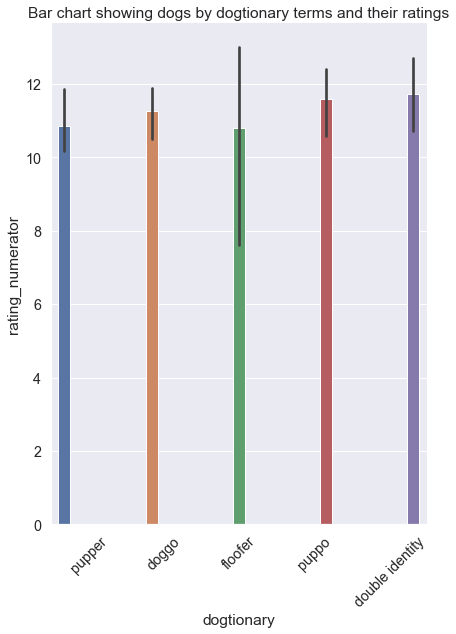

<Figure size 864x720 with 0 Axes>

In [69]:
# plot bar chart showing relationship between dogtionary and favorite_count
sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.3)
g = sns.catplot(x='dogtionary', y='rating_numerator', hue='dogtionary', data=df_master,\
            kind='bar', height=8, aspect=.8)

# setting title 
titles = ['Bar chart showing dogs by dogtionary terms and their ratings']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

plt.xticks(rotation=45)
plt.show();
sns.despine()

**Insight 2**

For dogs under review, is there a relationship between favorite and retweets counts?

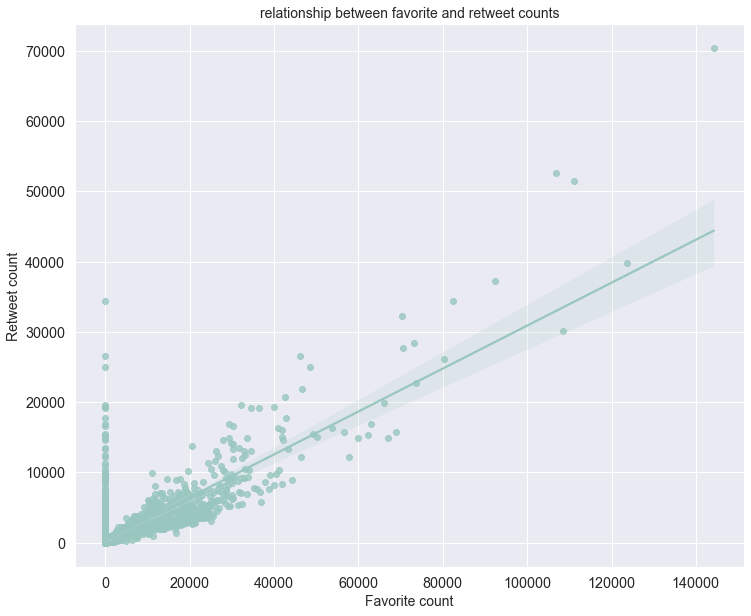

In [70]:
# plot scatter plot showing relationship between  favorite and retweet counts
sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.3)
sns.set_palette("Set3", 20, .65)

ax = sns.regplot(x=df_master.favorite_count, y=df_master.retweet_count)

# setting of axes labels and title
ax.set_title('relationship between favorite and retweet counts', fontsize=14)
ax.set_xlabel('Favorite count', fontsize=14)
ax.set_ylabel('Retweet count', fontsize=14)
plt.show()

### 6. Conclusions <div id ='Conclusions'></div>

 In the course of assessing and wrangling tweet and image data gotten through programmatic download from udacity servers in addition to data from Twitter API, 16 issues were detected and documented. However, only 13 were cleaned of which 10 were quality issues and the balance of 3 were tidyness issues. technicaally 2 out of the 3 left out were cleaned in the process of extracting only needed columns from json_text!. It can be concluded that dataframes met the conditions of clean data after sucessful merger and storage into a master archive.
 
Data Analysis and Visualization were carried out on the master archive leading to conclusions that:

- Dogs with double identities tend to rate higher than those who identify with just one of the original doctionary terms.
- There is a strong relationship between favourite and retweet counts.
- Puppers is the largest dogtionary category of dogs represented by the dataset.

**Limitations**

While Assessing, wrangling and exploring datasets in this project, the following limitations were encountered:
- dirty data (this is the totality of quality issues detected)
- messy data (this is the summation of all tidyness issues encountered)
- bureaucracy in getting elevated access for app develoment
- waiting on rate limit for API downloads due to character limits

### 7. References <div id ='References'></div>


https://developer.twitter.com/en/docs/rate-limits, ref1


https://charactercounter.com/twitter ref2


https://pandas.pydata.org/docs/reference/api/pandas.read_json.html ref3


https://pandas.pydata.org/docs/user_guide/indexing.html ref4


https://numpy.org/doc/stable/reference/generated/numpy.logical_not.html ref5


https://pandas.pydata.org/docs/user_guide/indexing.html ref6


https://thispointer.com/how-to-add-columns-to-numpy-array-in-python/  ref7

